## Método de clasificación _K-means Clustering_

No supervisado

16/08/2023

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d # Módulo de geometría computacional para calcular y visualizar diagramas de Voronoi

In [4]:
np.random.seed(23)
X = np.random.rand(100, 2) 
X.shape

(100, 2)

In [5]:
X.size

200

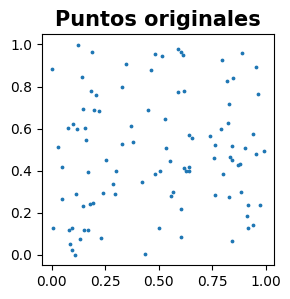

In [6]:
plt.figure( figsize = (3,3) )
plt.scatter( X[:,0], X[:, 1], s = 3)
plt.title('Puntos originales', size = 15, weight = 'bold')
plt.show()


### Implemento el modelo de KMeans

In [7]:
# Número de clusters
n_clusters = 5

# Implementación del modelo  
kmeans = KMeans( n_clusters= n_clusters, n_init= 20, 
                 random_state= 10 ).fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Centroides de los clusters
centroides = kmeans.cluster_centers_

In [8]:
labels

array([4, 3, 1, 2, 0, 1, 3, 4, 3, 2, 3, 2, 3, 0, 3, 4, 1, 2, 3, 1, 4, 0,
       2, 0, 4, 3, 4, 2, 4, 2, 3, 3, 4, 2, 3, 1, 3, 1, 2, 1, 3, 2, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 2, 2, 0, 1, 4, 3, 0, 4, 0, 0, 0, 2, 4, 2, 0,
       1, 2, 1, 3, 1, 4, 0, 1, 1, 3, 4, 2, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1,
       4, 2, 0, 4, 2, 1, 0, 1, 3, 3, 3, 3])

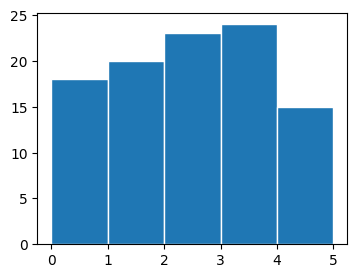

In [9]:
plt.figure( figsize = (4,3) )
plt.hist(labels, bins= 5, range = (0, 5), edgecolor = 'white')
plt.show()

In [10]:
centroides

array([[0.55925437, 0.39024758],
       [0.19391709, 0.71552106],
       [0.16787948, 0.20444998],
       [0.86268872, 0.38997309],
       [0.70547547, 0.87718288]])

### Cálculo el diagrama de Voronoi

In [11]:
vor = Voronoi( centroides )
vor

**Gráficas**

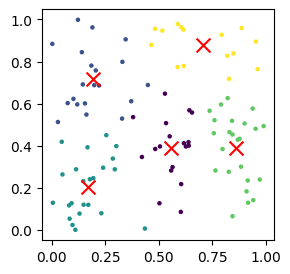

In [12]:
plt.figure( figsize = (3,3) )
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
for n in range(len(centroides)):
    plt.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c ='red' )
plt.show()

In [13]:
kmeans.predict([[0.5, 0.2]])

array([0])

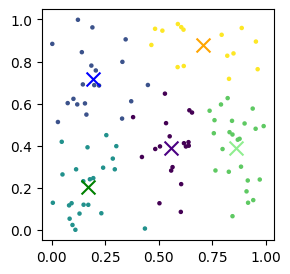

In [14]:
colors = ['indigo', 'blue', 'green', 'lightgreen', 'orange']
plt.figure( figsize = (3,3) )
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
for n in range(len(centroides)):
    plt.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c = colors[n] )
plt.show()

### Diagrama de Voronoi

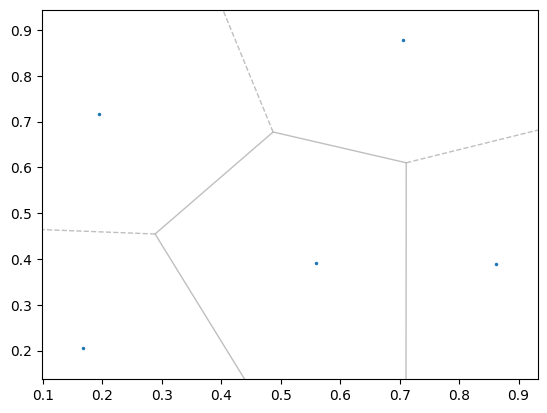

In [15]:
voronoi_plot_2d( vor, show_vertices =False, line_colors = 'grey',
                line_widh = 50, line_alpha = 0.5 , point_size = 3)
plt.show()

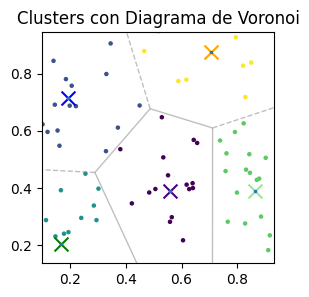

In [16]:
fig, ax = plt.subplots( figsize= (3,3))
voronoi_plot_2d( vor, ax = ax, show_vertices =False, line_colors = 'grey',
                line_widh = 50, line_alpha = 0.5 , point_size = 3)
ax.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
ax.set_title('Clusters con Diagrama de Voronoi')
for n in range(len(centroides)):
    ax.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c = colors[n] )
plt.show()

Uso generadores de nubes de puntos (blobs)

In [17]:
from sklearn.datasets import make_blobs # Generados de nube de puntos
import seaborn as sns

In [18]:
n_samples = 1500
random_state = 23
X, y = make_blobs( n_samples = n_samples, random_state = random_state)

In [19]:
X.shape

(1500, 2)

In [20]:
y.shape

(1500,)

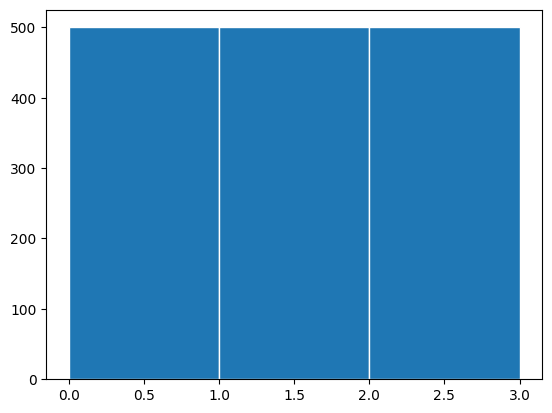

In [21]:
plt.hist(y, bins=3, range= (0, 3), edgecolor = 'white')
plt.show()

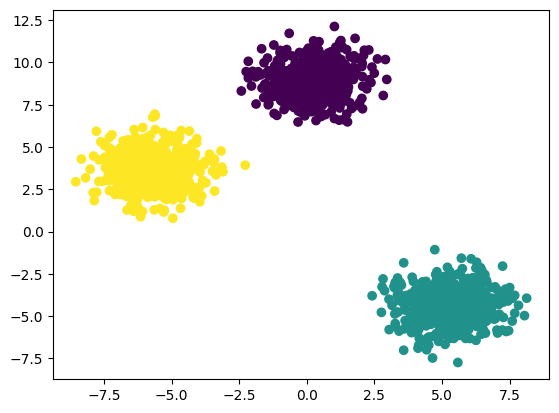

In [22]:
plt.scatter(X[:,0], X[:, 1], c = y)
plt.show()

In [23]:
# Número de clusters
n_clusters = 3

# Implementación del modelo  
kmeans = KMeans( n_clusters= n_clusters, n_init= 20, 
                 random_state= 10 ).fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Centroides de los clusters
centroides = kmeans.cluster_centers_

vor = Voronoi( centroides )

In [24]:
centroides

array([[ 0.25144148,  8.90066736],
       [ 5.29884081, -4.3505235 ],
       [-5.66878002,  3.68344882]])

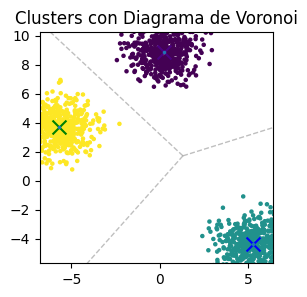

In [25]:
fig, ax = plt.subplots( figsize= (3,3))
voronoi_plot_2d( vor, ax = ax, show_vertices =False, line_colors = 'grey',
                line_widh = 50, line_alpha = 0.5 , point_size = 3)
ax.scatter(X[:, 0], X[:, 1], c = labels, s = 5 )
ax.set_title('Clusters con Diagrama de Voronoi')
for n in range(len(centroides)):
    ax.scatter( centroides[n, 0], centroides[n, 1], 
                marker= 'x', s = 100, c = colors[n] )
plt.show()

## Clase 17/08/2023

Modificaciones de los blobs

In [26]:
transformation = [[0.608, -0.636], [-0.408, 0.852]]
transformation

[[0.608, -0.636], [-0.408, 0.852]]

In [27]:
X.shape

(1500, 2)

In [28]:
np.dot(X, transformation).shape

(1500, 2)

In [29]:
X_t = np.dot(X, transformation) # X cambió

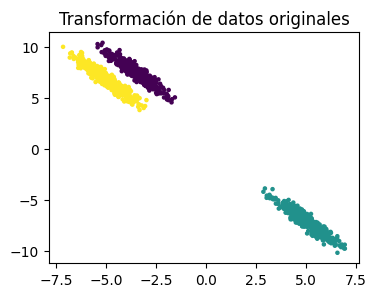

In [30]:
plt.figure( figsize = (4,3) )
plt.scatter(X_t[:, 0], X_t[:, 1], c = labels, s = 5 )
plt.title('Transformación de datos originales')
plt.show()

Considero el caso en que cada blob tiene una varianza diferente

In [50]:
X_v, y_v = make_blobs( n_samples = n_samples, random_state = random_state, cluster_std = [1,4.5,0.5])

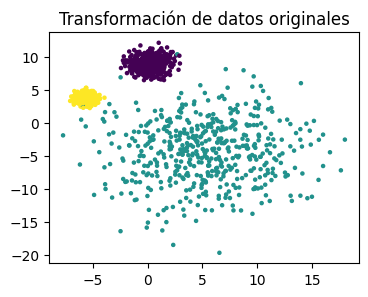

In [51]:
plt.figure( figsize = (4,3) )
plt.scatter(X_v[:, 0], X_v[:, 1], c = labels, s = 5 )
plt.title('Transformación de datos originales')
plt.show()

Selecciono una cantidad de puntos diferente para cada conjunto

In [33]:
X_f = np.vstack( (X[y == 0][:500], X [y == 1][:100], X[ y==2 ][:10]))
X_f

array([[-0.40359034,  8.61608908],
       [-0.90254593,  8.58605946],
       [-2.23956682,  9.45853981],
       ...,
       [-5.86153123,  5.49037248],
       [-3.94554617,  3.51075145],
       [-6.49672183,  3.75250289]])

In [34]:
y_f = [0] * 500 + [1] * 100 + [2]*10

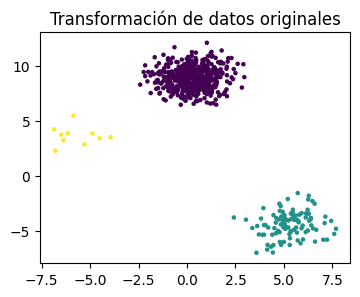

In [35]:
plt.figure( figsize = (4,3) )
plt.scatter(X_f[:, 0], X_f[:, 1], c = y_f, s = 5 )
plt.title('Transformación de datos originales')
plt.show()

In [36]:
y[:20]

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2])

In [37]:
y == 1

array([ True, False, False, ..., False, False, False])

Gráfico conjunto de las nubes de puntos

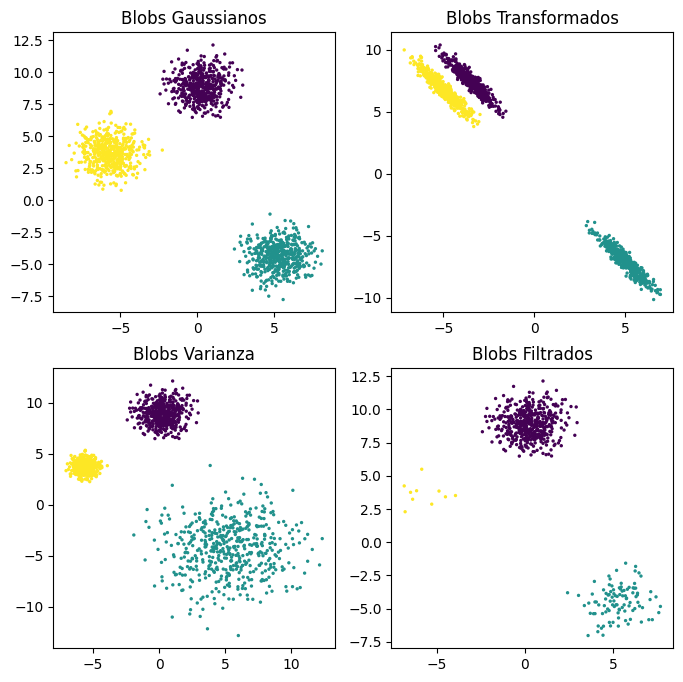

In [38]:
fig, axs = plt.subplots( nrows = 2, ncols = 2, figsize = (8,8))

axs[0,0].scatter(X[:, 0], X[:,1], c = y, s=2)
axs[0,0].set_title('Blobs Gaussianos')

axs[0,1].scatter(X_t[:, 0], X_t[:,1], c = y, s=2)
axs[0,1].set_title('Blobs Transformados')

axs[1,0].scatter(X_v[:, 0], X_v[:,1], c = y, s=2)
axs[1,0].set_title('Blobs Varianza')

axs[1,1].scatter(X_f[:, 0], X_f[:,1], c = y_f, s=2)
axs[1,1].set_title('Blobs Filtrados')

plt.show()

Para determinar el número de clusters conveniente se **evalúan las INERCIAS**

**INERCIA**: Es la suma de las distancias al cuadrado entre cada punto y su centroide más cercano, para todos los clústers

In [39]:
inercias = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, n_init = 10)
    kmeans.fit(X)
    inercias.append(round(kmeans.inertia_,2))

print(inercias)

[77716.85, 18588.59, 3021.5, 2654.08, 2326.55, 1981.96, 1762.46, 1563.58, 1369.8, 1259.51]


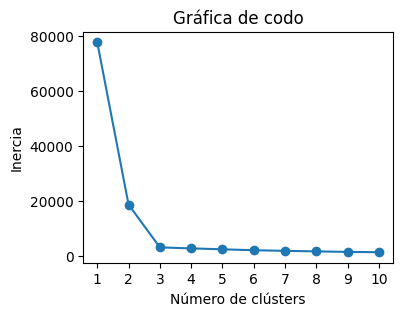

In [40]:
plt.figure( figsize= (4,3) )
plt.title('Gráfica de codo')
plt.plot(range(1, 11), inercias, '-o')
plt.xlabel('Número de clústers')
plt.ylabel('Inercia')
plt.xticks(range(1,11))
plt.show()

### Coeficiente de silueta

La silueta mide la calidad de la agrupación en clústers

Cuánto más alto sea el coeficiente de silueta mayor es la calidad de la clusterización. Rango de Silueta: $(-1 , 1)$

Silueta = 1 ; Claseificación de muy buena calidad

Silueta = -1 ; Pésima clasificación.

In [41]:
from sklearn.metrics import silhouette_score

In [43]:
# El coeficiente de silueta requiere mínimo dos clústers
silhouette_coeficientes = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters = n, n_init = 10)
    kmeans.fit(X)
    coeficiente = silhouette_score(X, kmeans.labels_)
    silhouette_coeficientes.append(round(coeficiente,2))

print(silhouette_coeficientes)

[0.72, 0.81, 0.66, 0.47, 0.32, 0.33, 0.33, 0.33, 0.33]


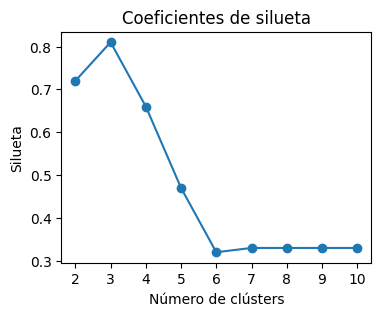

In [46]:
plt.figure( figsize= (4,3))
plt.title('Coeficientes de silueta')
plt.plot(range(2, 11), silhouette_coeficientes, '-o')
plt.xticks(range(2,11))
plt.xlabel( 'Número de clústers' )
plt.ylabel( 'Silueta' )
plt.show() 

### Implementación KMeans para los casos considerados

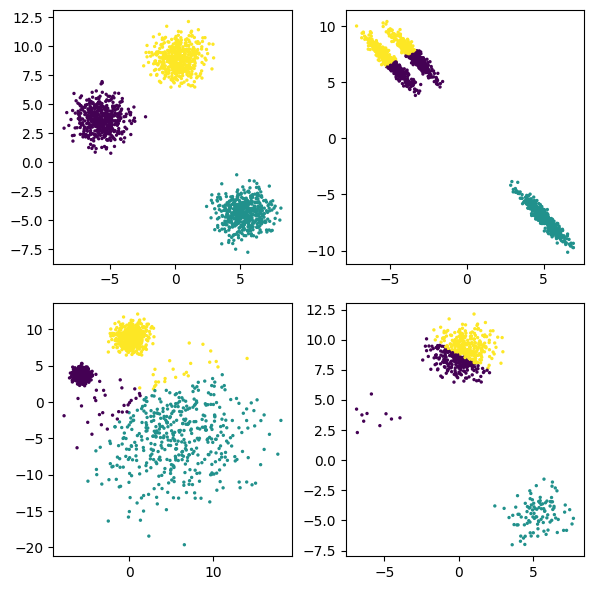

In [61]:
common_params = {'n_init':'auto',
                 'random_state':random_state,
                 'n_clusters':3}

fig, axs = plt.subplots( nrows= 2, ncols= 2, figsize = (6,6) )

y_pred = KMeans(**common_params).fit_predict(X)
axs[0,0].scatter(X[:, 0], X[:, 1], c = y_pred, s = 2)

y_pred = KMeans(**common_params).fit_predict(X_t)
axs[0,1].scatter(X_t[:, 0], X_t[:, 1], c = y_pred, s = 2)

y_pred = KMeans(**common_params).fit_predict(X_v)
axs[1,0].scatter(X_v[:, 0], X_v[:, 1], c = y_pred, s = 2)

y_pred = KMeans(**common_params).fit_predict(X_f)
axs[1,1].scatter(X_f[:, 0], X_f[:, 1], c = y_pred, s = 2)

plt.tight_layout()
plt.show()